In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from metrics.charts import TrainingCharts
from datasets.xor import XOR
from experiment.runExperiment import RunExperiment
from experiment.models import ModelSetups
from training.train import TrainUtil
from metrics.charts import ChartUtil

In [129]:
dataset = XOR()
in_features = 6
out_features = 2
X_train, y_train, X_val, y_val = dataset.get_dataset(in_features = in_features, unique = True)
trainUtil = TrainUtil(X_train, y_train, X_val = X_val, y_val = y_val)

In [130]:
import numpy as np


datasetValidation = np.zeros((11))
for i in [i.sum() for i in X_train]:
    datasetValidation[int(i.item())]+=1
print(datasetValidation)

datasetValidation = np.zeros((11))
for i in [i.sum() for i in X_val]:
    datasetValidation[int(i.item())]+=1
print(datasetValidation)

[ 1.  6. 12. 16. 11.  5.  0.  0.  0.  0.  0.]
[0. 0. 3. 4. 4. 1. 1. 0. 0. 0. 0.]


In [131]:
experiment = RunExperiment(trainUtil)
modelSetups = ModelSetups()
trainUtil.set_data_granularity(1)

In [132]:
layers = 3
model_params_all = {"l1": (200, 15), "l2": (250, 20), "l3": (200, 10)}
model_params_first = {"l1": (200, 15), "l2": (250, None), "l3": (200, None)}
model_params_second = {"l1": (200, None), "l2": (250, 20), "l3": (200, None)}
model_params_third = {"l1": (200, None), "l2": (250, None), "l3": (200, 10)}
model_params_first_second = {"l1": (200, 15), "l2": (250, 20), "l3": (200, None)}
model_params_first_third = {"l1": (200, 15), "l2": (250, None), "l3": (200, 10)}
model_params_second_third = {"l1": (200, None), "l2": (250, 20), "l3": (200, 10)}

In [133]:
def get_models_to_plot_from_combined(combined_charts):
    sparse_models = [ i  for i in combined_charts.get_models() if "Sparse" in i]
    control_models = [ i for i in combined_charts.get_models() if "Control" in i]
    dense_models = [ i for i in combined_charts.get_models() if "Dense" in i]

    return sparse_models, control_models, dense_models

In [ ]:
model_types = {"Complete Sparse model": model_params_all, 
               "1st L Sparse": model_params_first, 
               "2nd L Sparse": model_params_second,
               "3rd L Sparse": model_params_third,
               "1st and 2nd L Sparse": model_params_first_second,
               "1st and 3rd L Sparse": model_params_first_third,
               "2nd and 3rd L Sparse": model_params_second_third
            }
chartUtils_6D = {}
chartUtils_6D["all"] = experiment.perform_one_experiment(
    models = 
    {
        "Control Model": modelSetups._get_control_model,
        "Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["Complete Sparse model"],
    n_epochs=150,
    # n_runs = 20
    # batch_train= True
)

for modelName in model_types:
    chartUtils_6D[modelName] = experiment.perform_one_experiment(
        models = {
            modelName: modelSetups._get_sparse_model,
            },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers, 
        model_params = model_types[modelName],
        n_epochs = 150,
        # n_runs = 20
        # batch_train= True
        )

In [135]:
model_keys = list(chartUtils_6D.keys())
combined_charts: ChartUtil = chartUtils_6D[model_keys[0]]

for key in model_keys[1:]:
    combined_charts = combined_charts.combine_charts(chartUtils_6D[key])

sparse_models, control_models, dense_models = get_models_to_plot_from_combined(combined_charts)
combined_charts.set_colors_map()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/1756926469.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/1756926469.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/1756926469.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()


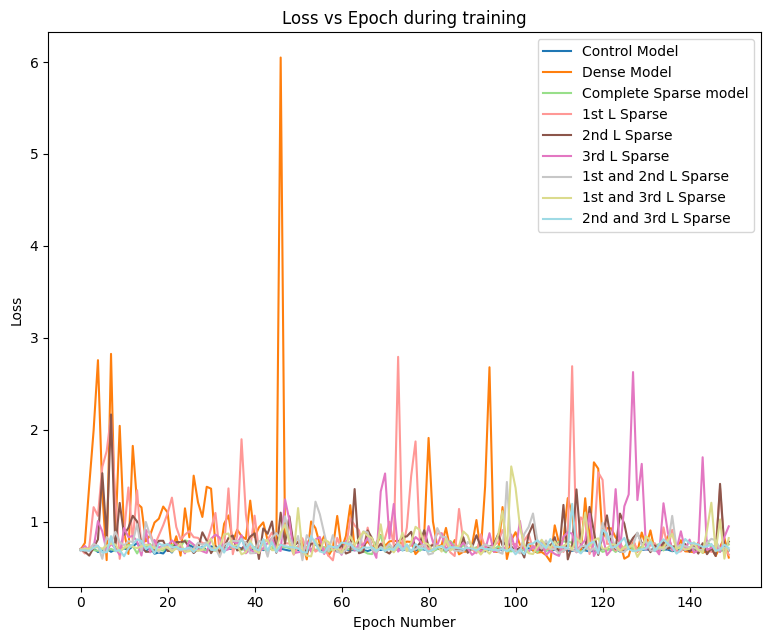

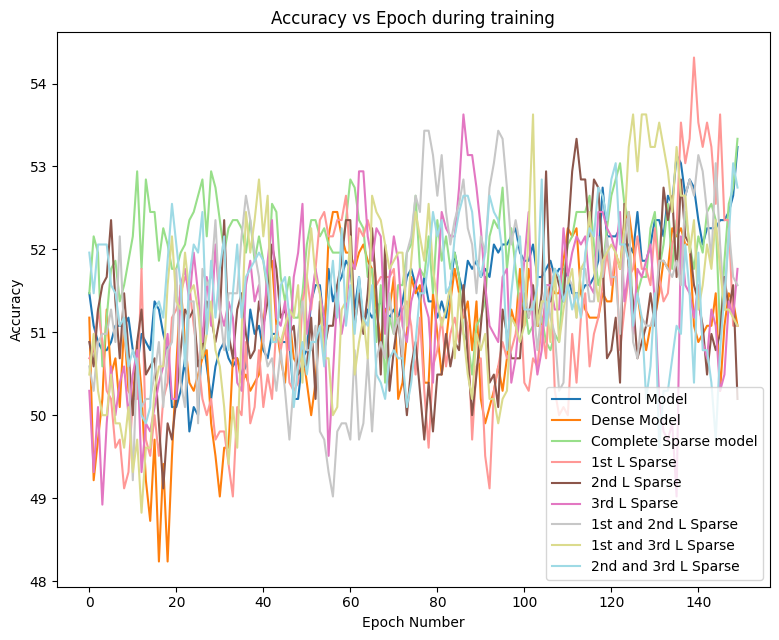

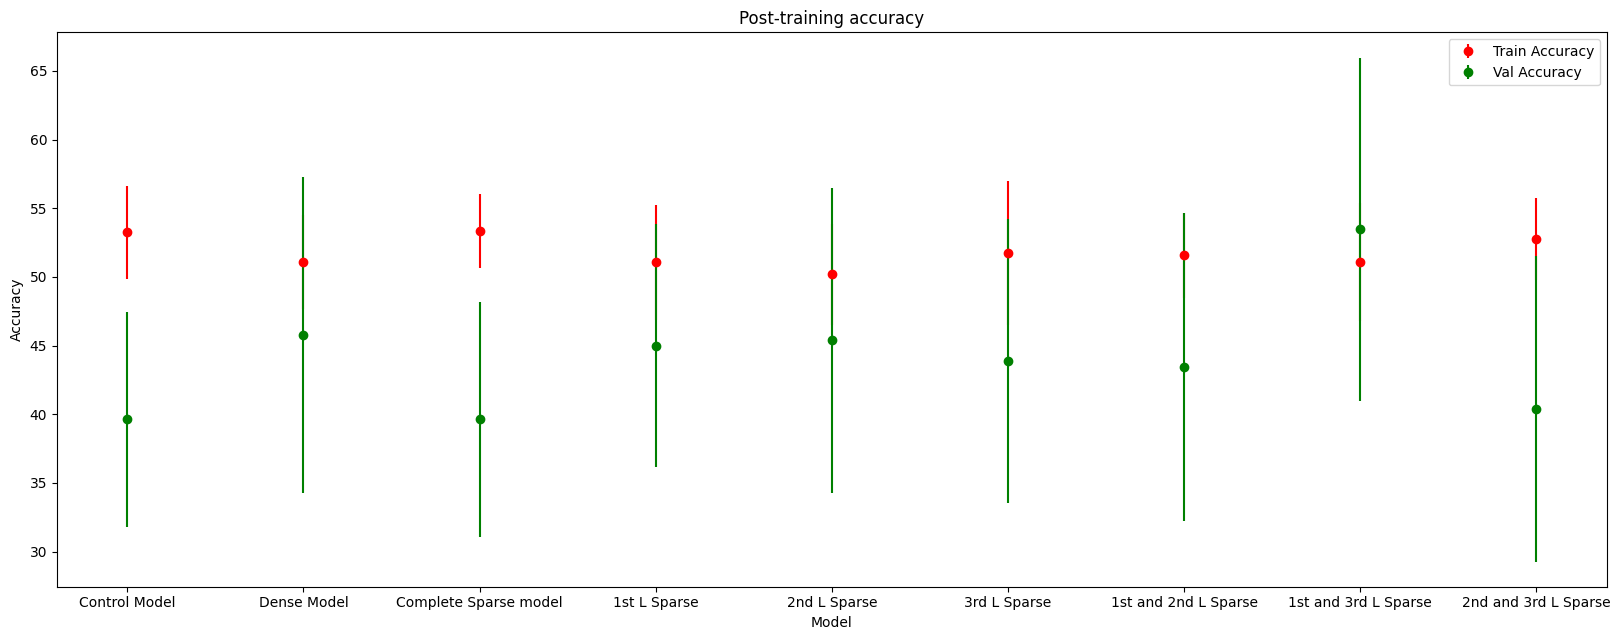

In [138]:
combined_charts.plot_training_data_for(no_std = True,
                                    #   models = control_models + dense_models 
                                       ).show()
combined_charts.plot_training_data_for(
    value_to_plot = TrainingCharts.ACC, 
    no_std = True,
    # models = control_models + dense_models   
    ).show()
combined_charts.plot_test_accu_for_models(
    width_alpha=3,
    # models = control_models + dense_models   
    ).show()

In [77]:
model_types = {"Complete Sparse model": model_params_all, 
               "1st L Sparse": model_params_first, 
               "2nd L Sparse": model_params_second,
               "3rd L Sparse": model_params_third,
               "1st and 2nd L Sparse": model_params_first_second,
               "1st and 3rd L Sparse": model_params_first_third,
               "2nd and 3rd L Sparse": model_params_second_third
            }
chartUtils = {}
chartUtils["all"] = experiment.perform_one_experiment(
    models = 
    {
        "Control Model": modelSetups._get_control_model,
        "Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["Complete Sparse model"],
    n_epochs=150,
    batch_train= True
)

for modelName in model_types:
    chartUtils[modelName] = experiment.perform_one_experiment(
        models = {
            modelName: modelSetups._get_sparse_model,
            },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers, 
        model_params = model_types[modelName],
        n_epochs = 150,
        batch_train= True
        )

In [78]:
model_keys = list(chartUtils.keys())
combined_charts: ChartUtil = chartUtils[model_keys[0]]

for key in model_keys[1:]:
    combined_charts = combined_charts.combine_charts(chartUtils[key])

sparse_models, control_models, dense_models = get_models_to_plot_from_combined(combined_charts)
combined_charts.set_colors_map()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/3746554768.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/3746554768.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/3746554768.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()


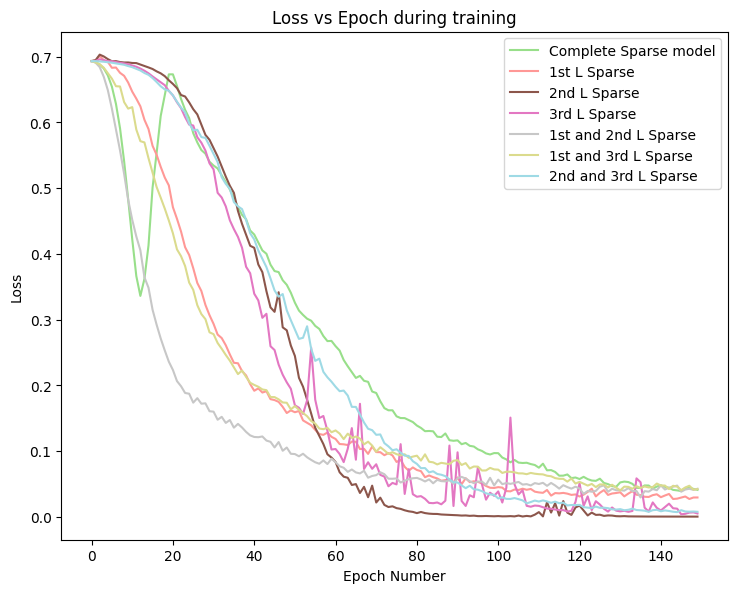

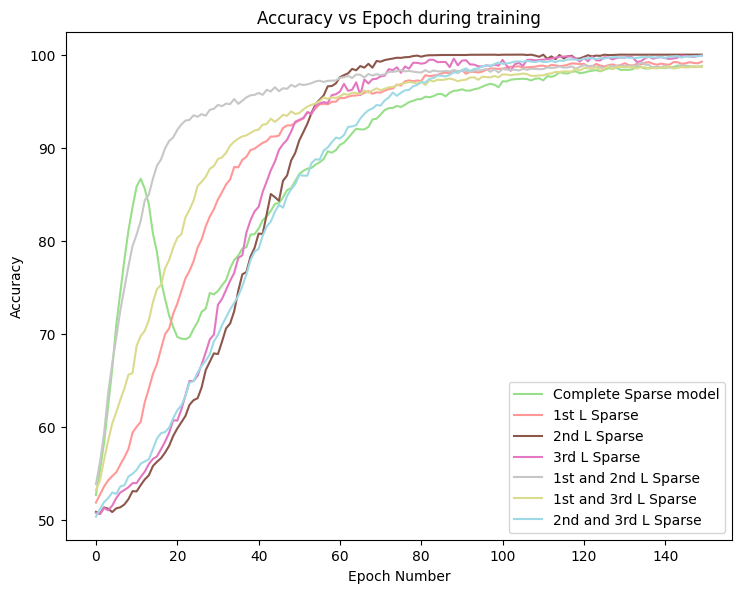

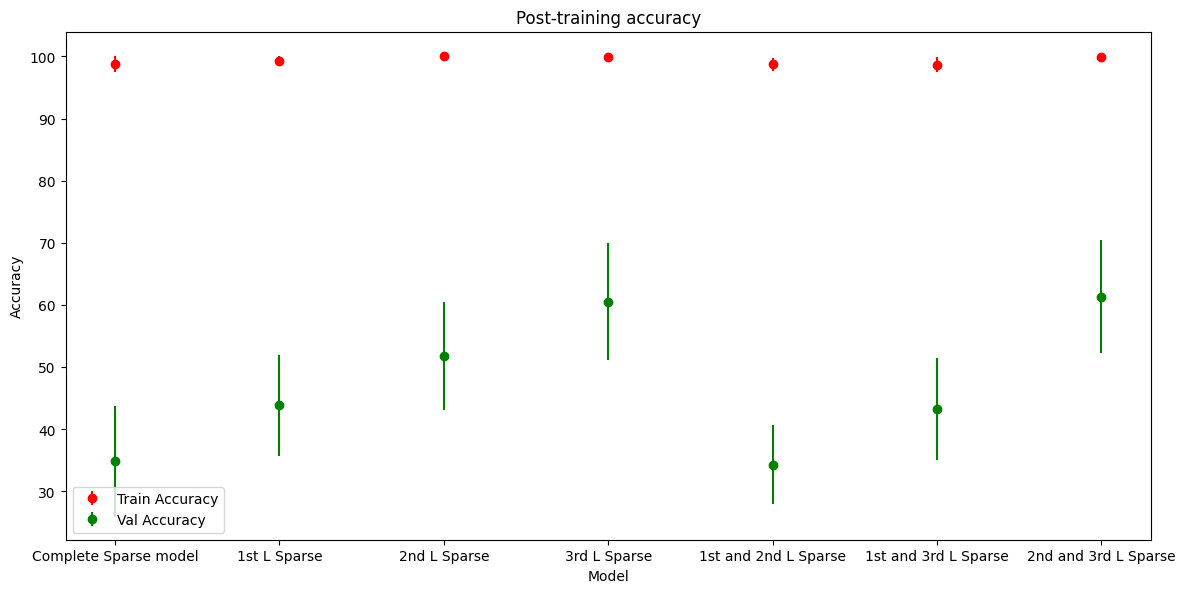

In [82]:
combined_charts.plot_training_data_for(no_std = True,
                                      models = sparse_models 
                                       ).show()
combined_charts.plot_training_data_for(
    value_to_plot = TrainingCharts.ACC, 
    no_std = True,
    models = sparse_models  
    ).show()
combined_charts.plot_test_accu_for_models(
    width_alpha=3,
    models = sparse_models  
    ).show()

In [121]:
model_types = {
    "Complete Sparse model": model_params_all, 
               "1st L Sparse": model_params_first, 
               "2nd L Sparse": model_params_second,
               "3rd L Sparse": model_params_third,
               "1st and 2nd L Sparse": model_params_first_second,
               "1st and 3rd L Sparse": model_params_first_third,
               "2nd and 3rd L Sparse": model_params_second_third
            }
chartUtils_10D = {}
chartUtils_10D["all"] = experiment.perform_one_experiment(
    models = 
    {
        "Control Model": modelSetups._get_control_model,
        "Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["Complete Sparse model"],
    n_epochs=200,
    batch_train= True,
    n_runs = 20
)

for modelName in model_types:
    print("Starting", modelName)
    chartUtils_10D[modelName] = experiment.perform_one_experiment(
        models = {
            modelName: modelSetups._get_sparse_model,
            },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers, 
        model_params = model_types[modelName],
        n_epochs = 200,
        batch_train= True,
        n_runs = 20
        )
    print("Ending", modelName)

Starting Complete Sparse model
Ending Complete Sparse model
Starting 1st L Sparse
Ending 1st L Sparse


In [122]:
len(X_train), len(X_val)

(819, 205)

In [125]:
model_keys = list(chartUtils_10D.keys())
combined_charts: ChartUtil = chartUtils_10D[model_keys[0]]

for key in model_keys[1:]:
    combined_charts = combined_charts.combine_charts(chartUtils_10D[key])

sparse_models, control_models, dense_models = get_models_to_plot_from_combined(combined_charts)
combined_charts.set_colors_map()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/2340586881.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/2340586881.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_69858/2340586881.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()


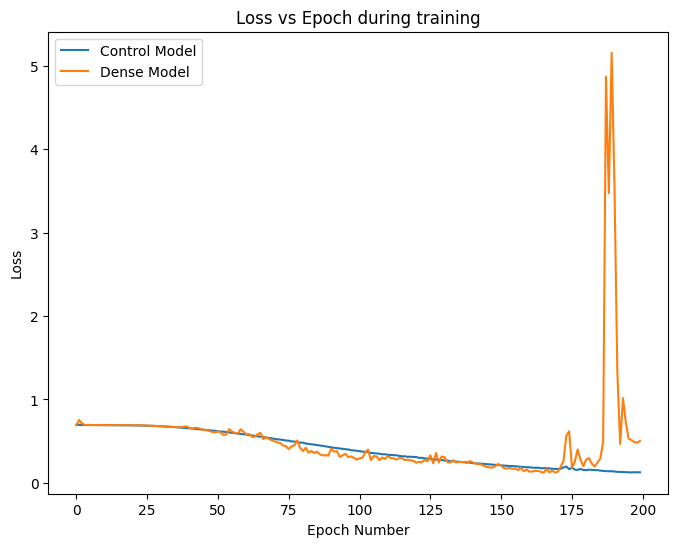

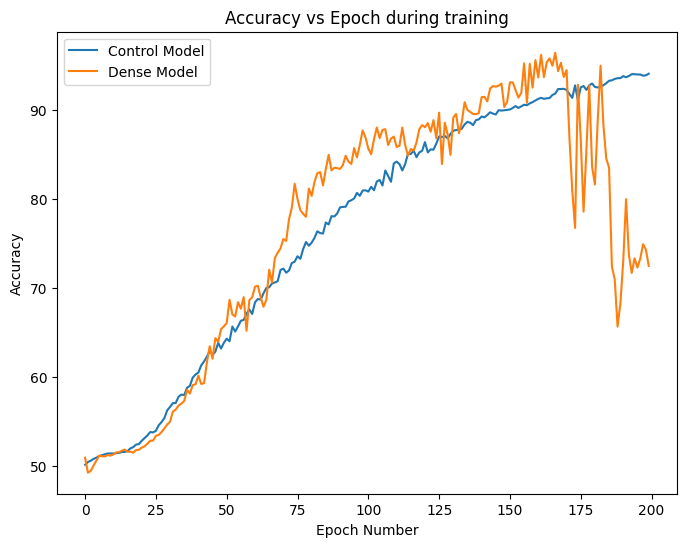

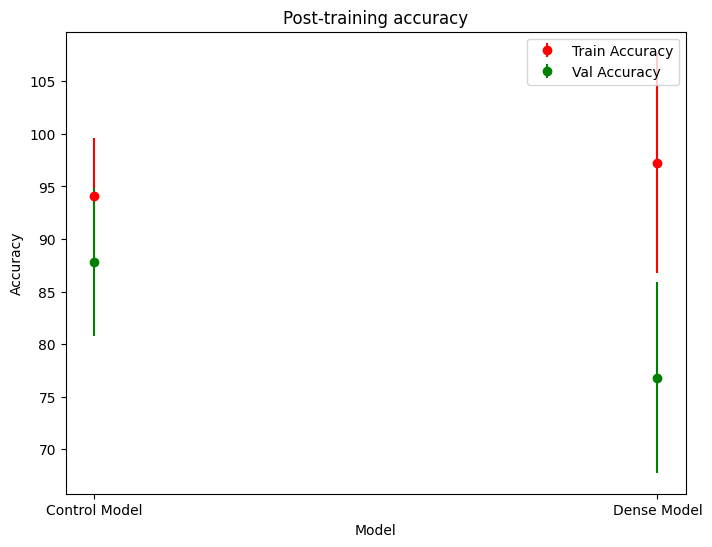

In [128]:
combined_charts.plot_training_data_for(no_std = True,
                                      models = control_models + dense_models 
                                       ).show()
combined_charts.plot_training_data_for(
    value_to_plot = TrainingCharts.ACC, 
    no_std = True,
    models = control_models + dense_models   
    ).show()
combined_charts.plot_test_accu_for_models(
    width_alpha=3,
    models = control_models + dense_models   
    ).show()